In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import nnfs
from nnfs.datasets import sine_data
import random
import requests
from NNS import NeuralNetwork as NN #import neural net code from github to reduce copy/pasting
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier

# Regression

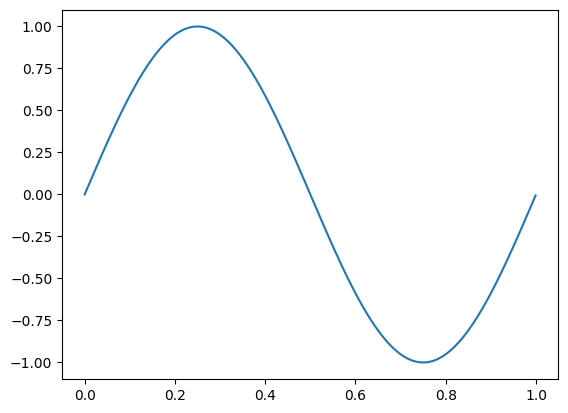

In [ ]:
# This is the way we will be working with
X, y = sine_data()
plt.plot(X,y)
plt.show()

## Linear Activation Function

In [7]:
class Activation_Linear:
    
    # Forward pass
    def forward(self, inputs):
        # Just remember values
        self.inputs = inputs
        self.output = inputs
        
    # Backward Pass
    def backward(self, dvalues):
        # deriviative of linear function is 1
        self.dinputs = dvalues.copy()

## Mean Squared loss and Mean Absolute Error Loss

In [ ]:
Loss = NN.Loss()
    
# Mean Squared Error Loss
class Loss_MeanSquaredError(Loss): # L2 loss
    
    # Forward Pass
    def forward(self, y_pred, y_true):
        
        # Calculate loss
        sample_losses = np.mean((y_true - y_pred)**2, axis=-1)
        return sample_losses
    
    def backward(self, dvalues, y_true):
        
        # Number of Samples
        samples = len(dvalues)
        outputs = len(dvalues[0])
        
        #Gradient on values
        self.dinputs = -2 * (y_true - dvalues) / outputs
        # Normalize Gradient
        self.dinputs = self.dinputs / samples
        
class Loss_MeanAbsoluteError(Loss): # L1 loss
    
    # Forward Pass
    def forward(self, y_pred, y_true):
        
        # Calculate loss
        sample_losses = np.mean(np.abs(y_true - y_pred), axis = -1)
        
        # Return losses
        return sample_losses
    
    # Backward pass
    def backward(self, dvalues, y_true):
        
        # Number of samples
        samples = len(dvalues)
        outputs = len(dvalues[0])
        
        # Calculate Gradient
        self.dinputs = np.sign(y_true - dvalues) / outputs
        # Normalize Gradient
        self.dinputs = self.dinputs / samples

In [8]:
X, y = sine_data()

# Layers
dense1 = NN.Layer_Dense(1,64)
activation1 = NN.Activation_ReLU()
dense2 = NN.Layer_Dense(64,1)
activation2 = Activation_Linear()

# Loss
loss_function = Loss_MeanSquaredError()

# Optimizer
optimizer = NN.Optimizer_Adam()

# Regression doesn't have a percise accutacy measure, we can make a synthetic one 
# by saying how close a estimate must be to the true value 
accuracy_precision = np.std(y) / 250

for epoch in tqdm(range(10001)):
    
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    data_loss = loss_function.calculate(activation2.output, y)
    regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2)
    loss = data_loss + regularization_loss
    
    predictions = activation2.output
    accuracy = np.mean(np.absolute(predictions - y) < accuracy_precision)
    
    # Backward pass
    loss_function.backward(activation2.output, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()
    
    if not epoch % 1000:
        print(  f'epoch: {epoch}, ' +
                f'acc: {accuracy :.3f} , ' +
                f'loss: {loss :.3f} (' +
                f'data_loss: {data_loss :.3f}, ' +
                f'reg_loss: {regularization_loss :.3f}), ' +
                f'lr: {optimizer.current_learning_rate}, ')


  1%|          | 124/10001 [00:00<00:15, 624.44it/s]

epoch: 0, acc: 0.002 , loss: 0.500 (data_loss: 0.500, reg_loss: 0.000), lr: 0.001, 


 11%|█▏        | 1133/10001 [00:01<00:13, 664.98it/s]

epoch: 1000, acc: 0.003 , loss: 0.149 (data_loss: 0.149, reg_loss: 0.000), lr: 0.001, 


 21%|██        | 2072/10001 [00:03<00:11, 710.32it/s]

epoch: 2000, acc: 0.004 , loss: 0.139 (data_loss: 0.139, reg_loss: 0.000), lr: 0.001, 


 31%|███▏      | 3134/10001 [00:04<00:09, 708.67it/s]

epoch: 3000, acc: 0.004 , loss: 0.078 (data_loss: 0.078, reg_loss: 0.000), lr: 0.001, 


 41%|████      | 4116/10001 [00:06<00:08, 708.85it/s]

epoch: 4000, acc: 0.016 , loss: 0.039 (data_loss: 0.039, reg_loss: 0.000), lr: 0.001, 


 51%|█████     | 5094/10001 [00:08<00:09, 509.88it/s]

epoch: 5000, acc: 0.103 , loss: 0.022 (data_loss: 0.022, reg_loss: 0.000), lr: 0.001, 


 61%|██████    | 6075/10001 [00:09<00:07, 539.34it/s]

epoch: 6000, acc: 0.157 , loss: 0.013 (data_loss: 0.013, reg_loss: 0.000), lr: 0.001, 


 71%|███████   | 7082/10001 [00:11<00:05, 554.33it/s]

epoch: 7000, acc: 0.201 , loss: 0.008 (data_loss: 0.008, reg_loss: 0.000), lr: 0.001, 


 81%|████████  | 8061/10001 [00:13<00:04, 481.55it/s]

epoch: 8000, acc: 0.228 , loss: 0.005 (data_loss: 0.005, reg_loss: 0.000), lr: 0.001, 


 91%|█████████ | 9079/10001 [00:15<00:01, 565.42it/s]

epoch: 9000, acc: 0.237 , loss: 0.003 (data_loss: 0.003, reg_loss: 0.000), lr: 0.001, 


100%|██████████| 10001/10001 [00:17<00:00, 581.22it/s]

epoch: 10000, acc: 0.271 , loss: 0.002 (data_loss: 0.002, reg_loss: 0.000), lr: 0.001, 


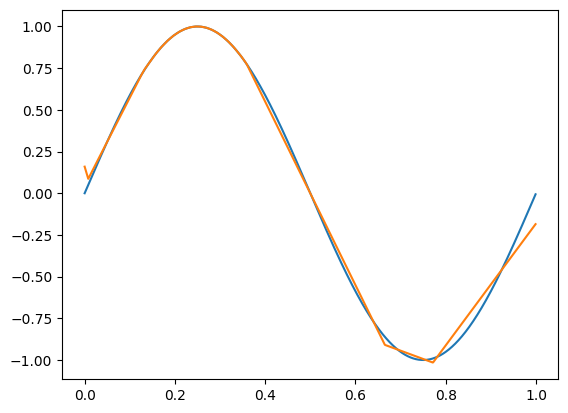

In [9]:
plt.plot(X,y)
plt.plot(X, predictions)
plt.show()

  0%|          | 23/10001 [00:00<00:43, 229.30it/s]

epoch: 0, acc: 0.002 , loss: 0.500 (data_loss: 0.500, reg_loss: 0.000), lr: 0.001, 


 11%|█         | 1053/10001 [00:04<00:36, 245.13it/s]

epoch: 1000, acc: 0.046 , loss: 0.003 (data_loss: 0.003, reg_loss: 0.000), lr: 0.001, 


 20%|██        | 2041/10001 [00:08<00:32, 244.68it/s]

epoch: 2000, acc: 0.800 , loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.001, 


 30%|███       | 3038/10001 [00:12<00:30, 226.22it/s]

epoch: 3000, acc: 0.924 , loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.001, 


 40%|████      | 4032/10001 [00:16<00:24, 240.58it/s]

epoch: 4000, acc: 0.980 , loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.001, 


 50%|█████     | 5037/10001 [00:20<00:19, 249.45it/s]

epoch: 5000, acc: 0.992 , loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.001, 


 60%|██████    | 6029/10001 [00:24<00:16, 244.80it/s]

epoch: 6000, acc: 0.995 , loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.001, 


 70%|███████   | 7032/10001 [00:29<00:12, 240.76it/s]

epoch: 7000, acc: 0.997 , loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.001, 


 80%|████████  | 8042/10001 [00:33<00:08, 228.79it/s]

epoch: 8000, acc: 0.997 , loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.001, 


 90%|█████████ | 9033/10001 [00:37<00:04, 232.27it/s]

epoch: 9000, acc: 0.999 , loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.001, 


100%|██████████| 10001/10001 [00:41<00:00, 238.99it/s]

epoch: 10000, acc: 1.000 , loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.001, 


<function matplotlib.pyplot.show(close=None, block=None)>

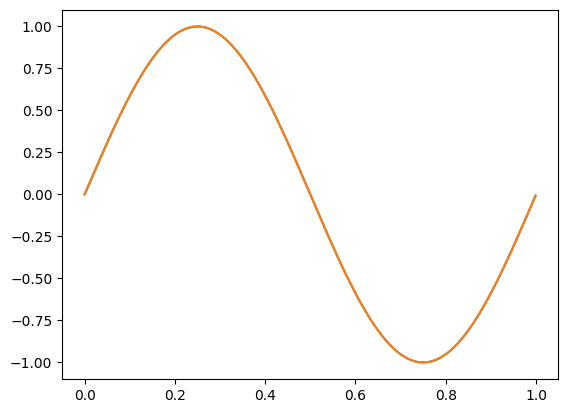

In [11]:
X, y = sine_data()

# Layers
dense1 = NN.Layer_Dense(1,64)
activation1 = NN.Activation_ReLU()
dense2 = NN.Layer_Dense(64,64)
activation2 = NN.Activation_ReLU()
dense3 = NN.Layer_Dense(64,1)
activation3 = Activation_Linear()

# Loss
loss_function = Loss_MeanSquaredError()

# Optimizer
optimizer = NN.Optimizer_Adam()

# Regression doesn't have a percise accutacy measure, we can make a synthetic one 
# by saying how close a estimate must be to the true value 
accuracy_precision = np.std(y) / 250

for epoch in tqdm(range(10001)):
    
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    dense3.forward(activation2.output)
    activation3.forward(dense3.output)
    data_loss = loss_function.calculate(activation3.output, y)
    regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2) + loss_function.regularization_loss(dense3)
    loss = data_loss + regularization_loss
    
    predictions = activation3.output
    accuracy = np.mean(np.absolute(predictions - y) < accuracy_precision)
    
    # Backward pass
    loss_function.backward(activation3.output, y)
    activation3.backward(loss_function.dinputs)
    dense3.backward(activation3.dinputs)
    activation2.backward(dense3.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)
    
    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_params(dense3)
    optimizer.post_update_params()
    
    if not epoch % 1000:
        print(  f'epoch: {epoch}, ' +
                f'acc: {accuracy :.3f} , ' +
                f'loss: {loss :.3f} (' +
                f'data_loss: {data_loss :.3f}, ' +
                f'reg_loss: {regularization_loss :.3f}), ' +
                f'lr: {optimizer.current_learning_rate}, ')

plt.plot(X,y)
plt.plot(X, predictions)
plt.show